# Lab 4 – Activation and Loss Functions 
- We are going to see a few activation and loss functions called from PyTorch and also written from scratch (in plain Python)
- We will plot the graphs for these functions

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

### Softmax Function
- The main function to use would be `torch.nn.Softmax()`
- It is also available as `torch.softmax()` and `torch.nn.functional.softmax()`

In [12]:
# We will use this sample data
x = torch.tensor([-2.0, 0, 1.0, 3.0])

# Softmax from PyTorch
sm = nn.Softmax(dim=0) # Also torch.softmax(x, dim=0)
print("Softmax output of x")
output = sm(x)
print(output)


Softmax output of x
tensor([0.0057, 0.0418, 0.1135, 0.8390])


In [13]:
# Q1. Sum up the values in output
# CODE
print(output.sum())
# Q2. Why do they sum up to the value in Q1?

# TEXT
# The softmax function convert a vector of real numbers into a probability distribution.
# Actually, the softmax takes vector of k real numbers and returns a vector of k probabilities,
# where each probability is number between 0 and 1, and the sum of all probabilities is equal to 1.
# Therefore, it seems that we added these values to see if 1 comes out to be converted to probability well.

tensor(1.)


### Softmax from scratch

In [14]:
# Softmax using plain Python (should give same result as before)
def my_softmax(nums):
    t = np.exp(nums)
    t = t / t.sum(axis=0, keepdims=False)
    return t

soft = my_softmax(x)
print(soft)

tensor([0.0057, 0.0418, 0.1135, 0.8390])


In [15]:
# Q3. If x represents the raw output (logits) of a neural network, with 4 classes (0-3), which class would be returned by the softmax classifier?
# TEXT
# 3. Since the output value of softmax represents the probability corresponding to each class, 
# it will be classified as class 3 with the highest probability.

### Let's plot what this softmax function looks like

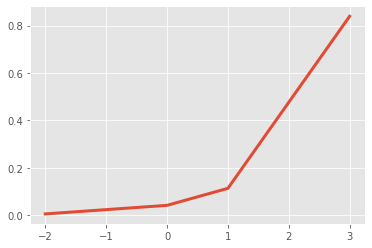

In [16]:
# Plot tensors values (x) against softmax values (y)
plt.style.use('ggplot')
plt.plot(x, soft, linewidth=3.0)

In [17]:
# Q4. What do you understand from this graph?

# TEXT
# The sigmoid function slowly increases and returns only a value between 0 and 1.
# and it returns the probability proportional to the value of a given input.
# It shows a steeper rise when the input is positive.

## Sigmoid Function
- The main function to use would be `torch.nn.Sigmoid()`
- It is also available as `torch.sigmoid()` and `torch.nn.functional.sigmoid()`

In [ ]:
# Sigmoid from PyTorch
s = nn.Sigmoid() # Also torch.sigmoid(x)
output = s(x)
print("Sigmoid output of x")
print(output)

Sigmoid output of x
tensor([0.1192, 0.5000, 0.7311, 0.9526])


In [18]:
# Q5. Sum up the values in output
# CODE
print(output.sum())
# Q6. Do they sum to one? Why?
# TEXT
# Yes. This seems to be a coincidence because there is no condition that the sum of the sigmoid functions is always 1.

tensor(1.)


### Sigmoid from scratch

In [19]:
# Sigmoid in plain Python (should give same result as before)

def my_sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

sig = my_sigmoid(x)
print(sig)

tensor([0.1192, 0.5000, 0.7311, 0.9526])


### Let's plot what this sigmoid function looks like

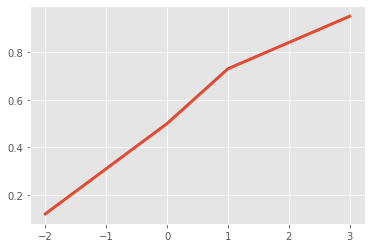

In [20]:
import matplotlib.pyplot as plt

# Q7. Plot x on the x axis and the their sigmoid values on the y axis
# CODE
plt.style.use('ggplot')
plt.plot(x, sig, linewidth=3.0)

In [ ]:
# Q8. Does the curve look like what you've seen in the lecture?
# TEXT
# No. It looks as if it's linear.

Let's get more data and see if we can get a more "S-shaped" curve

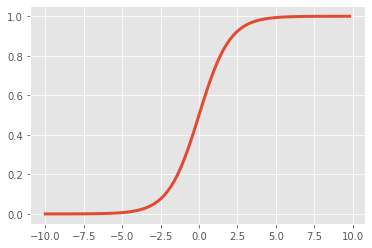

In [22]:
# Create a range of numbers from -10 to 10
newx = torch.arange(-10., 10., 0.2)

# Q9. Get their sigmoid values using my_sigmoid()
# CODE
sig = my_sigmoid(newx)
# Q10. Plot newx against their sigmoid values
# CODE
plt.style.use('ggplot')
plt.plot(newx, sig, linewidth=3.0)

In [ ]:
# Q11. Does the graph look more like what you expect?
# TEXT
# Yes. 

## Hyperbolic Tan Function
- The main function to use would be `torch.nn.Tanh()`
- It is also available as `torch.tanh()` and `torch.nn.functional.tanh()`


In [23]:
# tanh from PyTorch. Also F.tanh()
print("Hyperbolic tan output of x")
t = nn.Tanh() # Also torch.tanh(x)
output = t(x)
print(output)

Hyperbolic tan output of x
tensor([-0.9640,  0.0000,  0.7616,  0.9951])


### Plot the tanh graph

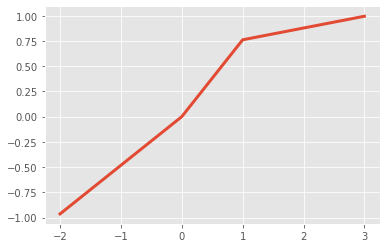

In [24]:
plt.style.use('ggplot')
plt.plot(x, output, linewidth=3.0)

Again, we do not see a clear S-shape. Let's try to use more data and derive tanh from sigmoid.

### Tanh from Sigmoid

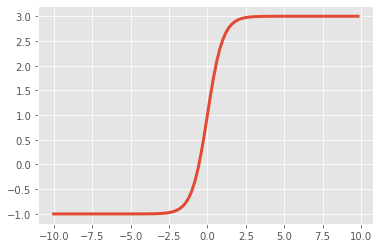

In [26]:
# This is your new data
newt = torch.arange(-10., 10., 0.2)

# Q12. Calculate tanh using my_sigmoid() above. Remember that tanh = 2*(2*sigmoid(2x) - 1
# You may want to use np.dot()
# CODE
tanh = 2*(2*my_sigmoid(2*newt))-1
# Q13. Plot newt against their tanh values derived using sigmoid
plt.plot(newt, tanh, linewidth = 3.0)

In [ ]:
# Q14. What's the difference between this graph and the graph for sigmoid in Q10?
# TEXT
# It is steeper than sigmoid and has a wider output range from -1 to 1.

## ReLU
- The main function to use would be `torch.nn.ReLU()`
- It is also available as `torch.relu()` and `torch.nn.functional.relu()`

In [27]:
# ReLU from PyTorch
x = torch.tensor([-2.0, 0, 1.0, 3.0])

# First a ReLU instance will need to be created
relu = nn.ReLU() # Also torch.relu(x)
# Call the instance on the data
output = relu(x)
print("ReLU output of x")
print(output)

ReLU output of x
tensor([0., 0., 1., 3.])


### ReLU from scratch

[0, 0, tensor(1.), tensor(3.)]


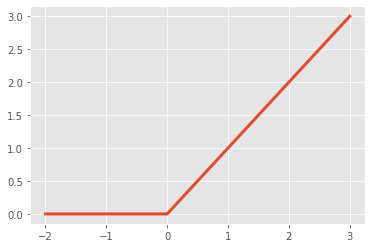

In [28]:
# ReLU using plain Python
x = torch.tensor([-2.0, 0, 1.0, 3.0])

relu = [max(0, i) for i in x]
print(relu)

# Plot x against their ReLU values
plt.style.use('ggplot')
plt.plot(x, relu, linewidth=3.0)

## Leaky ReLU
- The main function to use would be `torch.nn.LeakyReLU()`
- It is also available as `torch.nn.functional.leaky_relu()`
- PyTorch documentation: https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html

In [43]:
# leaky relu
x1 = torch.tensor([-5.0, 0, 1.0, 3.0])

# Q14. Calculate and print the leaky ReLU function for x1 using the main function for it in PyTorch
# Follow the same conventions as ReLU.
# CODE
leakyrelu = torch.nn.LeakyReLU() 
output = leakyrelu(x1)
print(output)

tensor([-0.0500,  0.0000,  1.0000,  3.0000])


In [51]:
# Q15. Given that the function for leaky ReLU is f(x) = a * x if x < 0; x otherwise, what is the value of 'a' from output of your function in Q14?
# MATHS / CODE
# torch.nn.LeakyReLU() has default 'a' value as 0.01.

# LeakyReLU : f(x) = x if x >= 0 ; a*x otherwise.
# function code 
def leakyrelu(input, a):
    return [max(i*a, i) for i in input]

# Q16. What does 'a' represent in the graph?
# TEXT
# 'a' controls the angle of the negative slope (which is used for negative input values).
# leaky relu has small, non-zero gradient for negative inputs, 
# so it helps prevent neurons dying-stop learning, losing the gradient.

### Plot the Leaky ReLU Function

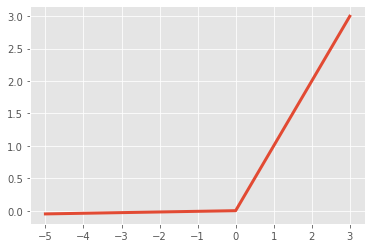

In [44]:
# Q17. Plot x1 against their Leaky ReLU values
plt.plot(x1, output, linewidth=3.0)

The graph may not look too different to ReLU. This is because of the range of the dataset we're using and the slope. Let's try to highlight the difference by adjusting these.

## Plot with more data

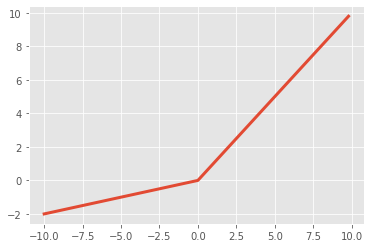

In [86]:
# Let's use this data with a larger range
newl = torch.arange(-10., 10., 0.2)

# Q18. Call the main LeakyReLU function on newl with the negative_slope argument set to 0.2
leakyrelu = torch.nn.LeakyReLU(0.2)
output = leakyrelu(newl)
# Q19. Plot newl against their leaky relu values from Q17.
plt.plot(newl, output, linewidth=3.0)

In [ ]:
# Q20. What would you need to set negative_slope to in order for this graph to be a straight line?
# TEXT
# 1 

## Loss Functions
We have seen Mean Squared Error (MSE) in action last week. It is one of the main loss functions for regression problems. Let's explore a few loss functions for regression and classification.

## Mean Squared Error (MSE) Loss / L2 Loss
- Computes the average of the squared differences between actual values and predicted values.
- Loss$(y, \hat{y}) = (y-\hat{y})^{2}$
- Always outputs a positive result, regardless of the sign of actual and predicted values. 
- The squaring implies that larger mistakes produce even larger errors than smaller ones. If the difference is off by 100, the error is 10,000. If it’s off by 0.1, the error is 0.01. This punishes the model for making big mistakes and encourages small mistakes. 
- To enhance the accuracy of the model, you should try to reduce the L2 Loss—a perfect value is 0.0
- Used for: Regression



In [30]:
# MSE Loss / L2 Loss
import torch
import torch.nn as nn

input = torch.tensor([-2.0, 0, 1.0, 3.0], requires_grad=True)
target = torch.tensor([-2.5, 0.3, 1.7, 5.0])

mse_loss = nn.MSELoss()
output = mse_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([-2.,  0.,  1.,  3.], requires_grad=True)
target:  tensor([-2.5000,  0.3000,  1.7000,  5.0000])
output:  tensor(1.2075, grad_fn=<MseLossBackward0>)


## Mean Absolute Error (MAE) Loss / L1 Loss
- Computes the average of the sum of absolute differences between actual values and predicted values.
- Loss$(y, \hat{y}) = |y-\hat{y}|$
- Checks the size of errors in a set of predicted values, without caring about their positive or negative direction.
- Considered to be more robust to outliers.
- Used for: Regression



In [31]:
import torch
import torch.nn as nn

target = torch.tensor([-2.5, 0.3, 1.7, 5.0])

mae_loss = nn.L1Loss()
output = mae_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([-2.,  0.,  1.,  3.], requires_grad=True)
target:  tensor([-2.5000,  0.3000,  1.7000,  5.0000])
output:  tensor(0.8750, grad_fn=<MeanBackward0>)


## Binary Cross Entropy Loss / Log Loss
- We want to maximise the probability of the predicted class to be the same as the correct class output given our input
- However, to maximise this class probability, a product of the probability of the output class given the input for all the samples will need to be calculated (Maximum Likelihood Estimation)
- Transforming these values to logs will turn this into a sum and also stabilise the computation (maximise log likelihood)
- On top of that, we multiply by -1 so that it now becomes a minimisation (of the negative log likelihood) problem, which will be quite convenient using gradient descent (next class).
- Think of it like changing from maximising the accuracy rate to minimising the error rate.
- Remember, ultimately, we are doing all this to optimise the weights and biases, which characterise the model
- Used for: Binary classification

In [32]:
import numpy as np
import torch
import torch.nn as nn

## BINARY CLASSIFICATION

# Actual labels
# NOTE: you do not need to one-hot encode the labels. The loss function expect an integer value with the corresponding class. 
labels = torch.tensor([1, 0, 1, 1, 1, 0], dtype=torch.float)
# Logits: raw output of the NN
logits = torch.tensor([2.5, -1.1, 1.2, 2.2, 0.1, -0.5], dtype=torch.float)

# Change logits to probabilities by running them over sigmoid
probs = torch.sigmoid(logits)

# Calculate BCE loss
bce = nn.BCELoss() # also torch.nn.functional.binary_cross_entropy()
output = bce(probs, labels)
print(output)
# tensor(0.3088)

tensor(0.3088)


In [55]:
# Q21. Redo the above using either torch.nn.BCEWithLogitsLoss() or torch.nn.functional.binary_cross_entropy_with_logits()
# CODE
bce = torch.nn.BCEWithLogitsLoss()
output = bce(logits, labels)
print(output)

tensor(0.3088)


### BCE from scratch
Source: https://github.com/rasbt/machine-learning-notes/blob/main/losses/pytorch-loss-functions/binary-cross-entropy-in-pytorch.ipynb

In [56]:
# BCE from scratch
def binary_logistic_loss(probas, y_targets):
    first = -y_targets.matmul(torch.log(probas)) # -y * log(y_hat)
    second = -(1 - y_targets).matmul(torch.log(1 - probas)) # -(1 - y) * log(1 - y_hat)
    return (first + second) / y_targets.shape[0] # add and divide by number of samples

binary_logistic_loss(probs, labels)

tensor(0.3088)

## Cross Entropy Loss / Negative Log Likelihood (NLL) Loss
- Applied on models with the softmax function as an output activation layer.
- Loss$(y_{i}, \hat{y_{i}}) = - \sum_{i}^{C} y_{i} \ \textrm{log}(\hat{y_{i}}))$
- Called negative (log likelihood) because the softmax probabilities (or likelihoods) vary between 0 and 1, and the logarithms of values in this range are negative.
- The model is punished for making the correct prediction with smaller probabilities and encouraged for making the prediction with higher probabilities.
- Used for: Multi-class classification

In [74]:
## MULTICLASS CLASSIFICATION
# Actual labels. Integer labels of the correct class is provided, e.g. class 1, class 0 and class 2
labels = torch.tensor([1, 0, 2], dtype=torch.long)

# Predicted logits (not transformed to probability distributions yet)
logits = torch.tensor([[2.5, -0.5, 0.1],
                        [-1.1, 2.5, 0.0],
                        [1.2, 2.2, 3.1]], dtype=torch.float)

ce = nn.CrossEntropyLoss() # Also torch.nn.functional.cross_entropy()
output = ce(logits, labels)
print(output)
# tensor(2.4258)


tensor(2.4258)


In [85]:
# Q22. Redo the above using torch.nn.functional.nll_loss()
# CODE
s = nn.Softmax()
probs = s(logits)
output = torch.nn.functional.nll_loss(probs, labels)
print(output)

tensor(-0.2370)


<ipython-input-85-0dbb5d5c5ba8>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = s(logits)
